In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

population = pd.read_csv('Datasets/population_data.csv')
data = pd.read_csv('Datasets/population_data.csv')

C:\Users\burka\AppData\Local\Temp\ipykernel_16196\3770621483.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot: ylabel='Population (2020)'>

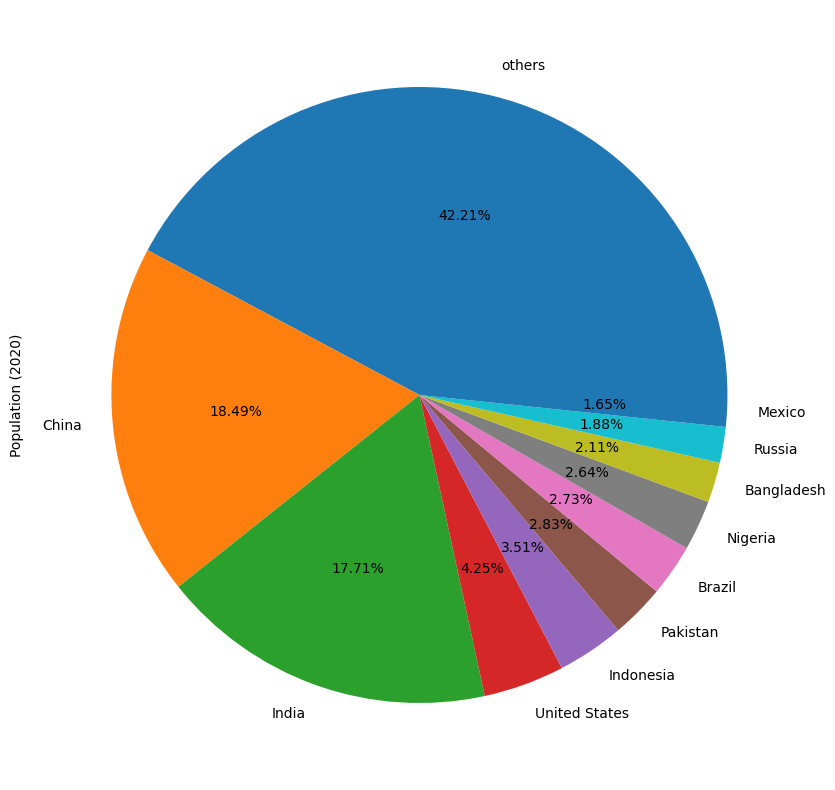

In [11]:
population.sort_values('Population (2020)', ascending=False, inplace=True)

# Select the top 10 rows of the sorted DataFrame
top10 = population.head(10)

# Select the remaining rows of the sorted DataFrame and compute the sum of their "Population (2020)" values
others = population.iloc[10:,:].sum()

# Append a new row to the population DataFrame that represents the sum of all the rows in others
temp = population.append(pd.DataFrame({"Category": "others",'Country (or dependency)':'others', "Population (2020)": others["Population (2020)"]}, index=[10]))

# Sort the modified population DataFrame in descending order based on the "Population (2020)" column
temp.sort_values('Population (2020)', ascending=False, inplace=True)

# Plot a pie chart of the top 11 rows of the modified population DataFrame
temp.head(11).plot.pie(y="Population (2020)", labels=temp.head(11)["Country (or dependency)"], legend=False, autopct="%1.2f%%", figsize=(10,10))

In [5]:
# Create a choropleth map of the data in the "Country (or dependency)" column, using the "Population (2020)" column as the data
fig = px.choropleth(data, locations="Country (or dependency)", locationmode='country names',
                    color="Population (2020)",
                    hover_name="Country (or dependency)",
                    color_continuous_scale='magenta')

# Update the layout of the plot to set the title text
fig.update_layout(title_text="World population in 2020")

# Show the plot
fig.show()


In [12]:
# Create a choropleth map of the data in the "Country (or dependency)" column, using the "Density (P/Km²)" column as the data
# Only include rows where the "Density (P/Km²)" values are less than 600
fig = px.choropleth(data[data['Density (P/Km²)'] < 600], locations="Country (or dependency)", locationmode='country names',
                    color="Density (P/Km²)",
                    hover_name="Country (or dependency)",
                    color_continuous_scale='Reds')

# Update the layout of the plot to set the title text
fig.update_layout(title_text="Population Density (P/Km²)")

# Show the plot
fig.show()


In [13]:
# Create a choropleth map of the data in the "Country (or dependency)" column, using the "Yearly Change" column as the data
fig = px.choropleth(data, locations="Country (or dependency)", locationmode='country names',
                    color=data["Yearly Change"],
                    hover_name="Country (or dependency)")

# Update the color axis to set the colorbar title text
fig.update_coloraxes(colorbar_title="Population change (%)")

# Update the layout of the plot to set the title text
fig.update_layout(title_text="World Population change (in percentage)")

# Show the plot
fig.show()


In [14]:
# Create a choropleth map of the data in the "Country (or dependency)" column, using the "Migrants (net)" column as the data
fig = px.choropleth(data, locations="Country (or dependency)", locationmode='country names',
                    color="Migrants (net)",
                    hover_name="Country (or dependency)",
                    color_continuous_scale='Ice')

# Update the layout of the plot to set the title text
fig.update_layout(title_text="Migrants")

# Show the plot
fig.show()


In [9]:
# Remove rows with "N.A." values in the "Fert. Rate" column
data_f_no_na = data[data["Fert. Rate"] != 'N.A.']

# Create a choropleth map of the data in the "Country (or dependency)" column, using the "Fert. Rate" column as the data
fig = px.choropleth(data_f_no_na, locations="Country (or dependency)", locationmode='country names',
                    color=data_f_no_na["Fert. Rate"].astype('float'),
                    hover_name="Country (or dependency)")

# Update the color axis to set the colorbar title text and the colorscale
fig.update_coloraxes(colorbar_title="Fertility Rate", colorscale="Greens")

# Update the layout of the plot to set the title text
fig.update_layout(title_text="Fertility Rate")

# Show the plot
fig.show()


In [15]:
# Remove rows with "N.A." values in the "Urban Pop %" column
data_u_no_na = data[data["Urban Pop %"] != 'N.A.']

# Create a new column "Pop_urban" that is the urban population percentage as an integer
data_u_no_na['Pop_urban'] = [int(x.split(' ')[0]) for x in data_u_no_na['Urban Pop %']]

# Create a choropleth map of the data in the "Country (or dependency)" column, using the "Pop_urban" column as the data
fig = px.choropleth(data_u_no_na, locations="Country (or dependency)", locationmode='country names',
                    color=data_u_no_na["Pop_urban"],
                    hover_name="Country (or dependency)")

# Update the color axis to set the colorbar title text and the colorscale
fig.update_coloraxes(colorbar_title="Urban population (%)", colorscale="gray")

# Update the layout of the plot to set the title text
fig.update_layout(title_text="Urban population (in percentage)")

# Show the plot
fig.show()


C:\Users\burka\AppData\Local\Temp\ipykernel_16196\2460327908.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

